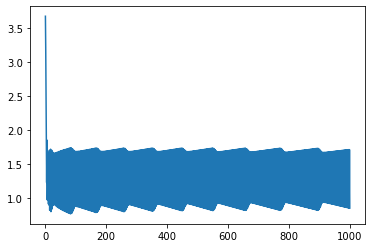

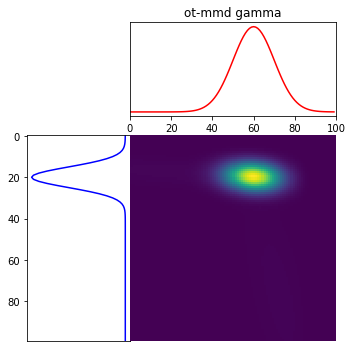

In [10]:
from ot_mmd.mmdot_mirror_descent import solve_md

import torch
import ot
from ot.datasets import make_1D_gauss as gauss

from ot_mmd.utils import get_cost_G, set_seed
import ot.plot
import matplotlib.pyplot as plt

set_seed(0)

m, n = 100, 100
device = torch.device("cuda" if torch.cuda.is_available else "cpu")
dtype = torch.float32
x = torch.arange(m, device=device, dtype=dtype)
y = torch.arange(n, device=device, dtype=dtype)

a = torch.from_numpy(gauss(m, 20, 5)).float().to(device)
b = torch.from_numpy(gauss(n, 60, 10)).float().to(device)
v = {1: a, 2: b}

max_itr = 1000

lda = 10
C, G = get_cost_G(x=x, y=y, khp=1e-3, ktype="rbf")

alpha, obj_itr = solve_md(C, G, v, max_itr, lda, case="unb")

plt.clf()
plt.plot(obj_itr)
plt.show()

plt.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(v[1].cpu().numpy(), v[2].cpu().numpy(), alpha.cpu().numpy(), "ot-mmd gamma")


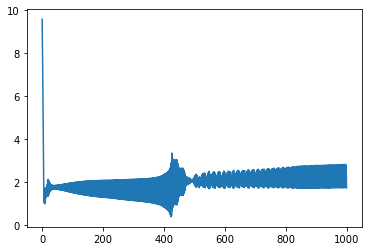

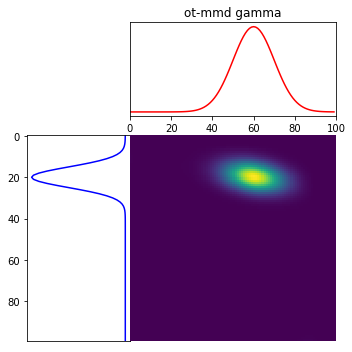

In [19]:
lda = 10
C, G = get_cost_G(x=x, y=y, khp=10, ktype="rbf")

alpha, obj_itr = solve_md(C, G, v, max_itr, lda, case="bal")

plt.clf()
plt.plot(obj_itr)
plt.show()

plt.figure(2, figsize=(5, 5))
ot.plot.plot1D_mat(v[1].cpu().numpy(), v[2].cpu().numpy(), alpha.cpu().numpy(), "ot-mmd gamma")
